In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sk_preprocessing
import sklearn.linear_model as sk_linear_models
import sklearn.metrics as sk_metrics
import sklearn.model_selection as sk_model_selection

In [2]:
def train_linear_model(X, y):
    linear_regression = sk_linear_models.LinearRegression()
    linear_regression.fit(X, y)
    return linear_regression


def get_MSE(model, X, y_true):
    y_predicted = model.predict(X)
    MSE = sk_metrics.mean_squared_error(y_true, y_predicted)
    return MSE

In [31]:
df = pd.read_csv(r'https://raw.githubusercontent.com/AndriiLatysh/ml_4/master/data/muscle_mass.csv')
df.sort_values(by="training_time", inplace=True)

X, y = df[["training_time"]], df[["muscle_mass"]]

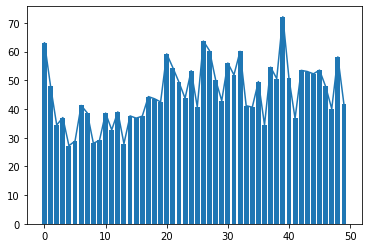

In [33]:
polynom_max = 50
test_MSE_iterations = [0]*50

for i in range(polynom_max):
    polynomial_transformer = sk_preprocessing.PolynomialFeatures(degree=i)
    X_transformed = polynomial_transformer.fit_transform(X)

    X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(
        X_transformed, y, shuffle=True)  # cross validation
    
    muscle_mass_model = train_linear_model(X_train, y_train)

    modeled_muscle_mass = muscle_mass_model.predict(X_train)
    test_MSE_iterations.append(get_MSE(muscle_mass_model, X_test, y_test))

plt.bar(list(range(polynom_max)), test_MSE_iterations)
plt.plot(list(range(polynom_max)), test_MSE_iterations)
plt.show()